## Final Project Submission

Please fill out:
* Student name: Esra Guzel
* Student pace: full time
* Scheduled project review date/time: ...
* Instructor name: Abhineeth Kulkarni
* Blog post URL: ....


In this project, I dealt with 'kc_house_data.csv' data which contains house prices from King County an area in the US State of Washington, this data also covers Seattle. To understand the data let's have a look at the information columns:

- id: unique identified for a house
- date: house was sold
- price: is prediction target
- bedrooms: number of Bedrooms/House
- bathrooms:  number of bathrooms/bedrooms
- sqft_livingsquare: footage of the home
- sqft_lotsquare: footage of the lot
- floors: floors (levels) in house
- waterfront: house which has a view to a waterfront
- view: has been viewed
- condition: how good the condition is ( Overall )
- grade: overall grade given to the housing unit, based on King County grading system
- sqft_above: square footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: built year
- yr_renovated: year when house was renovated
- zipcode: zip
- lat: latitude coordinate
- long: longitude coordinate
- sqft_living15: the square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors


## Obtaining the Data

In [1]:
# Importing the necessary libraries to start with
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df=pd.read_csv('kc_house_data.csv')

In [2]:
# Checking the data's first five rows
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
df.shape

(21597, 21)

## Scrubbing the Data

After obtaining our data, it is important to check the data type and missing values for each column. The 'date' and 'sqft_basement' columns are object which needs to be changed. Also, the top 5 frequent values are listed to have idea about the columns' values. This step is important to decide which column type will remain same and which will be changed to categorical data type. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
for col in df.columns:
    try:
        print(col, df[col].value_counts(normalize=True)[:5])
    except:
        print(col, df[col].value_counts(normalize=True))

    print('\n')

id 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64


date 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64


price 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
386100.0    0.000046
176250.0    0.000046
884744.0    0.000046
Name: price, Length: 3622, dtype: float64


bedrooms 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64


bathrooms 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
3.75    0.007177
4.00    0.006297
4.50    0.004630
4.25    0.003658
0.75    0.003287
4.75    0.001065
5.00    0.000972
Name: bathrooms, dt

In [6]:
# Checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The 'waterfront', 'view' and 'yr_renovated' columns have missing values. Since the 'waterfront', 'yr_renovated' and 'view' columns contain 0 more than 90%, the missing values is filled with 0. 

In [7]:
# Filling missing values with 0
missing = ['waterfront', 'yr_renovated', 'view']
for cols in df[missing]:
    df[cols].fillna(value=0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
# Dealing with the value ? in the 'sqft_basement' column
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
143.0     0.000046
875.0     0.000046
1816.0    0.000046
176.0     0.000046
2850.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [10]:
# Dropping rows with the value ?
df.drop(df.index[df['sqft_basement'] == '?'], inplace = True)

In [11]:
# Checking values again
df['sqft_basement'].value_counts(normalize=True)

0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
143.0     0.000047
875.0     0.000047
1816.0    0.000047
176.0     0.000047
2850.0    0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [12]:
# Changing the data type to 'float'
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)

In [13]:
# Changing the data type to 'datetime'
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')
df['date'].dtype

dtype('<M8[ns]')

In [14]:
# Checking the column
df['date'][:10]

0    2014-10-13
1    2014-12-09
2    2015-02-25
3    2014-12-09
4    2015-02-18
5    2014-05-12
7    2015-01-15
8    2015-04-15
9    2015-03-12
10   2015-04-03
Name: date, dtype: datetime64[ns]

When predicting house prices, months and seasons can be important. For this reason, I will add 'month' and 'season' columns to the dataframe. 

In [15]:
# Creating 'month' column 
df['month'] = df['date'].dt.month

In [16]:
# Creating 'season' column 
seasons = {
    12: 'winter',
    1: 'winter',
    2: 'winter',
    3: 'spring',
    4: 'spring',
    5: 'spring',
    6: 'summer',
    7: 'summer',
    8: 'summer',
    9: 'fall',
    10: 'fall',
    11: 'fall',
}
df['season'] = df['month'].replace(seasons)
df[['month', 'season']][:10]

        

month  season
0      10    fall
1      12  winter
2       2  winter
3      12  winter
4       2  winter
5       5  spring
7       1  winter
8       4  spring
9       3  spring
10      4  spring

In [17]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.114300e+04  2.114300e+04  21143.000000  21143.000000  21143.000000   
mean   4.581004e+09  5.405107e+05      3.372558      2.116079   2080.920730   
std    2.876328e+09  3.680751e+05      0.924917      0.768531    918.547562   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904940e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.309100e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.114300e+04  21143.000000  21143.000000  21143.000000  21143.000000   
mean   1.508714e+04      1.493591      0.006716      0.232654      3.409923   
std    4.120920e+04      0.539249      0.081679      0.764064      0.650498   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.043000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069550e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  ...  21143.000000   21143.000000  21143.000000  21143.000000   
mean   ...   1789.069006     291.851724   1971.023223     68.256492   
std    ...    828.409769     442.498337     29.321938    362.765827   
min    ...    370.000000       0.000000   1900.000000      0.000000   
25%    ...   1200.000000       0.000000   1952.000000      0.000000   
50%    ...   1560.000000       0.000000   1975.000000      0.000000   
75%    ...   2210.000000     560.000000   1997.000000      0.000000   
max    ...   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21143.000000  21143.000000  21143.000000    21143.00000   21143.000000   
mean   98077.868893     47.560274   -122.213876     1987.27139   12738.941967   
std       53.535756      0.138591      0.140597      685.67034   27169.273663   
min    98001.000000     47.155900   -122.519000      399.00000     651.000000   
25%    98033.000000     47.471250   -122.328000     1490.00000    5100.000000   
50%    98065.000000     47.572000   -122.230000     1840.00000    7626.000000   
75%    98117.000000     47.678200   -122.125000     2360.00000   10087.000000   
max    98199.000000     47.777600   -121.315000     6210.00000  871200.000000   

              month  
count  21143.000000  
mean       6.574658  
std        3.115428  
min        1.000000  
25%        4.000000  
50%        6.000000  
75%        9.000000  
max       12.000000  

[8 rows x 21 columns]

In [18]:
# Cheking for duplicated rows
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))
duplicates.head(10)

173


id       date      price  bedrooms  bathrooms  sqft_living  \
94    6021501535 2014-12-23   700000.0         3       1.50         1580   
314   4139480200 2014-12-09  1400000.0         4       3.25         4290   
325   7520000520 2015-03-11   240500.0         2       1.00         1240   
346   3969300030 2014-12-29   239900.0         4       1.00         1000   
372   2231500030 2015-03-24   530000.0         4       2.25         2180   
718   8820903380 2015-01-02   730000.0         6       2.25         2660   
824    726049190 2015-02-18   431000.0         3       1.00         1810   
837   8682262400 2015-05-13   419950.0         2       1.75         1350   
1085  9834200885 2015-04-20   550000.0         4       2.50         2080   
1128  8062900070 2015-02-13   369000.0         5       1.50         2550   

      sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
94        5000     1.0         0.0   0.0  ...          290.0      1939   
314      12103     1.0         0.0   3.0  ...         1600.0      1997   
325      12092     1.0         0.0   0.0  ...          280.0      1922   
346       7134     1.0         0.0   0.0  ...            0.0      1943   
372      10754     1.0         0.0   0.0  ...         1080.0      1954   
718      13579     2.0         0.0   0.0  ...            0.0      1937   
824       7200     1.0         0.0   0.0  ...          680.0      1954   
837       4003     1.0         0.0   0.0  ...            0.0      2004   
1085      4080     1.0         0.0   0.0  ...         1040.0      1962   
1128      6300     1.0         0.0   0.0  ...          990.0      1959   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
94             0.0    98117  47.6870 -122.386           1570        4500   
314            0.0    98006  47.5503 -122.102           3860       11244   
325         1984.0    98146  47.4957 -122.352           1820        7460   
346            0.0    98178  47.4897 -122.240           1020        7138   
372            0.0    98133  47.7711 -122.341           1810        6929   
718         1990.0    98125  47.7142 -122.286           1120        8242   
824            0.0    98133  47.7493 -122.351           1810        8100   
837            0.0    98053  47.7176 -122.033           1350        4479   
1085           0.0    98144  47.5720 -122.290           1340        4080   
1128           0.0    98056  47.5014 -122.172           1380        6300   

      month  season  
94       12  winter  
314      12  winter  
325       3  spring  
346      12  winter  
372       3  spring  
718       1  winter  
824       2  winter  
837       5  spring  
1085      4  spring  
1128      2  winter  

[10 rows x 23 columns]

The 173 rows seems to be duplicated however there is a strong possibility that a house may changed ownership a few times and sold for different prices. Since the data is still valuable, it is better to keep the data.   

## Exploring the Data

### Dealing with the Categorical Data

It essential to figure out which column should be evaluated as categorical data when predicting house prices. For this reason, I wanted to visualize the columns with scatter plot. 

In [19]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month'],
      dtype='object')

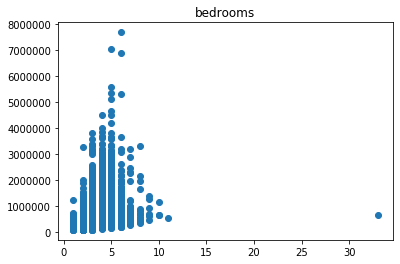

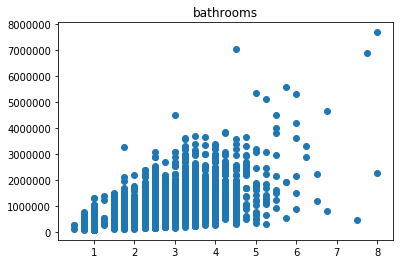

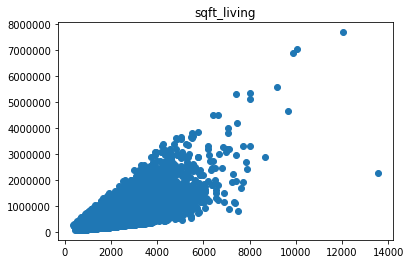

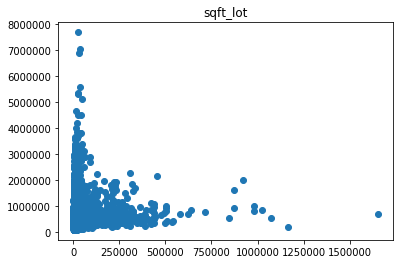

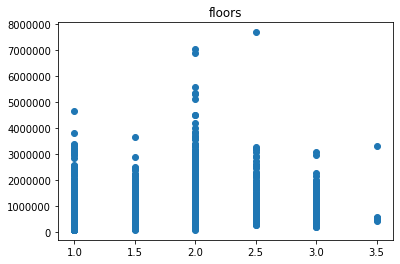

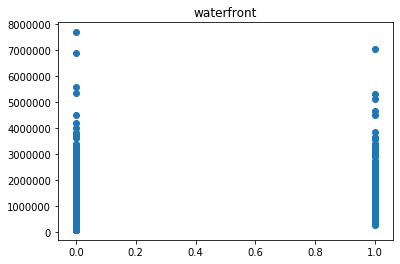

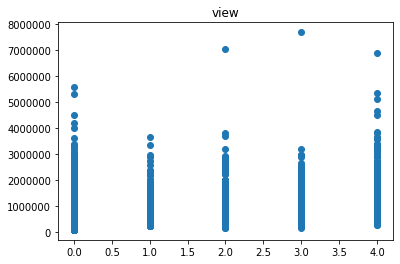

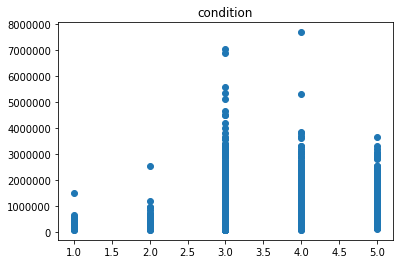

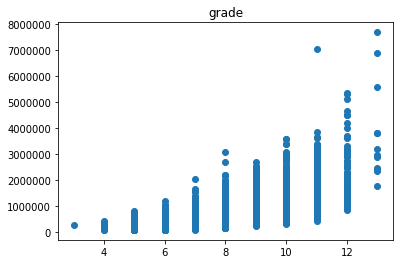

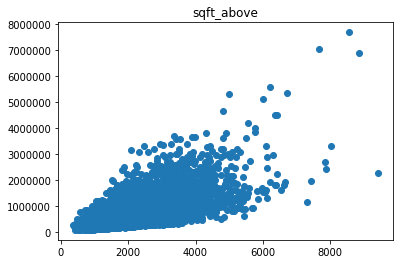

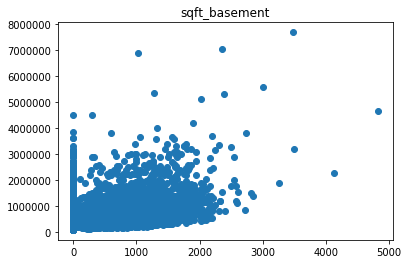

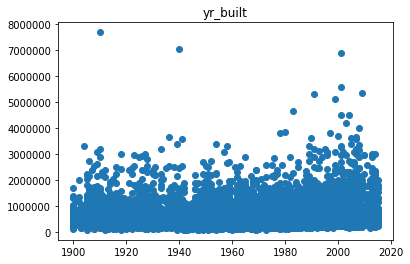

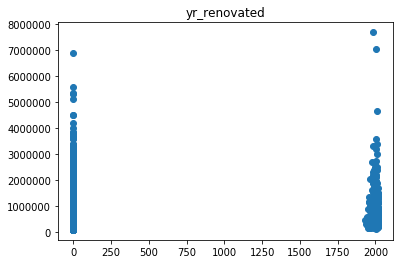

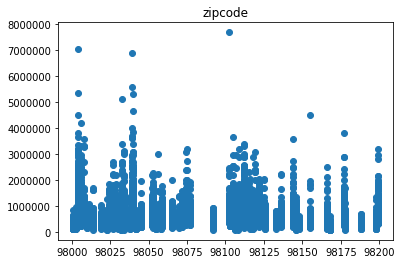

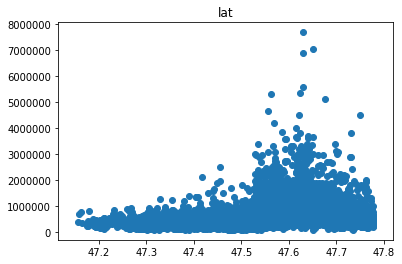

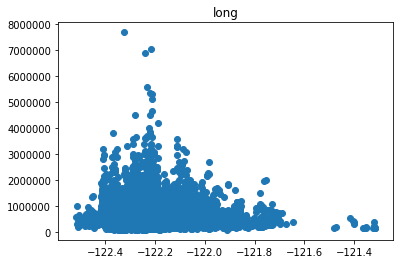

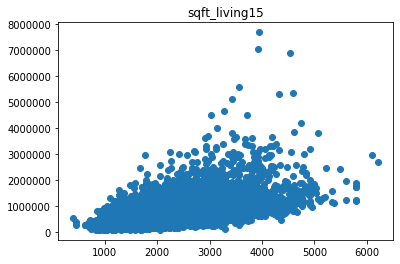

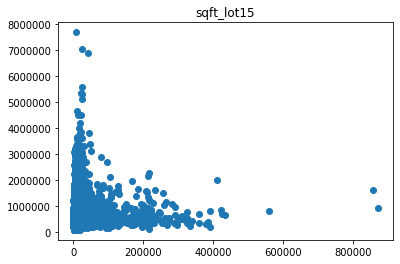

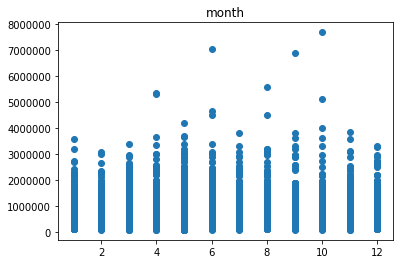

In [20]:

num_cols = df.select_dtypes('number').columns
num_cols

for col in num_cols[2:]:
    plt.scatter(df[col], df['price'])
    plt.title(col)
    plt.show()

Comments:
- 'bedrooms' column seems to have outliers. It may be evaluated as categorical value. 
- 'bathrooms' has balanced variety. It has a few outliers around 8. It is better to keep it as float. 
- It is obvious that 'sqft_living' has a linear relationship with price. It would be a good predictor after the outliers removed. 
- 'sqft_lot' can remain as integer. It may have a negative linearity with price.  
- It is clear that 'floors', 'waterfront', 'view' and 'condition' columns should be treated as categorical data. 
- 'grade' column shows great linearity. As a predictor it may have the highest coefficient. It can be treated as categorical. 
- 'sqft_above' and 'sqft_basement' columns show continuity and some linearity. 
- 'yr_built' shows continuity but not a clear positive linearity. It is observed that throughout the years the variance increased. 
- 'yr_renovated' and 'zipcode' columns should be treated as categorical data. 
- Tough 'lat' show some linearity both 'lat' and 'long' as well as 'zipcode' should be treated as categorical data. 

In [21]:
# Changing the column type and filling the values with one except the 0 values
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df[['yr_renovated','is_renovated']][:5]

yr_renovated  is_renovated
0           0.0             0
1        1991.0             1
2           0.0             0
3           0.0             0
4           0.0             0

In [22]:
# Changing the column type and filling the values with one except the 0 values
df['with_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df[['sqft_basement','with_basement']][:5]

sqft_basement  with_basement
0            0.0              0
1          400.0              1
2            0.0              0
3          910.0              1
4            0.0              0

In [23]:
df['waterfront'] = df['waterfront'].astype('category')
df['view'] =df['view'].astype('category')
df['season'] = df['season'].astype('category')
df['is_renovated'] = df['is_renovated'].astype('category')
df['floors']=df['floors'].astype('category')
df['condition']=df['condition'].astype('category')
df['month']=df['month'].astype('category')
df['grade']=df['grade'].astype('category')
df['with_basement'] = df['with_basement'].astype('category')

In [24]:
import seaborn as sns

In [25]:
cat_col=['waterfront', 'view', 'season', 'is_renovated', 'floors', 'condition', 'month', 'grade', 'with_basement', ]

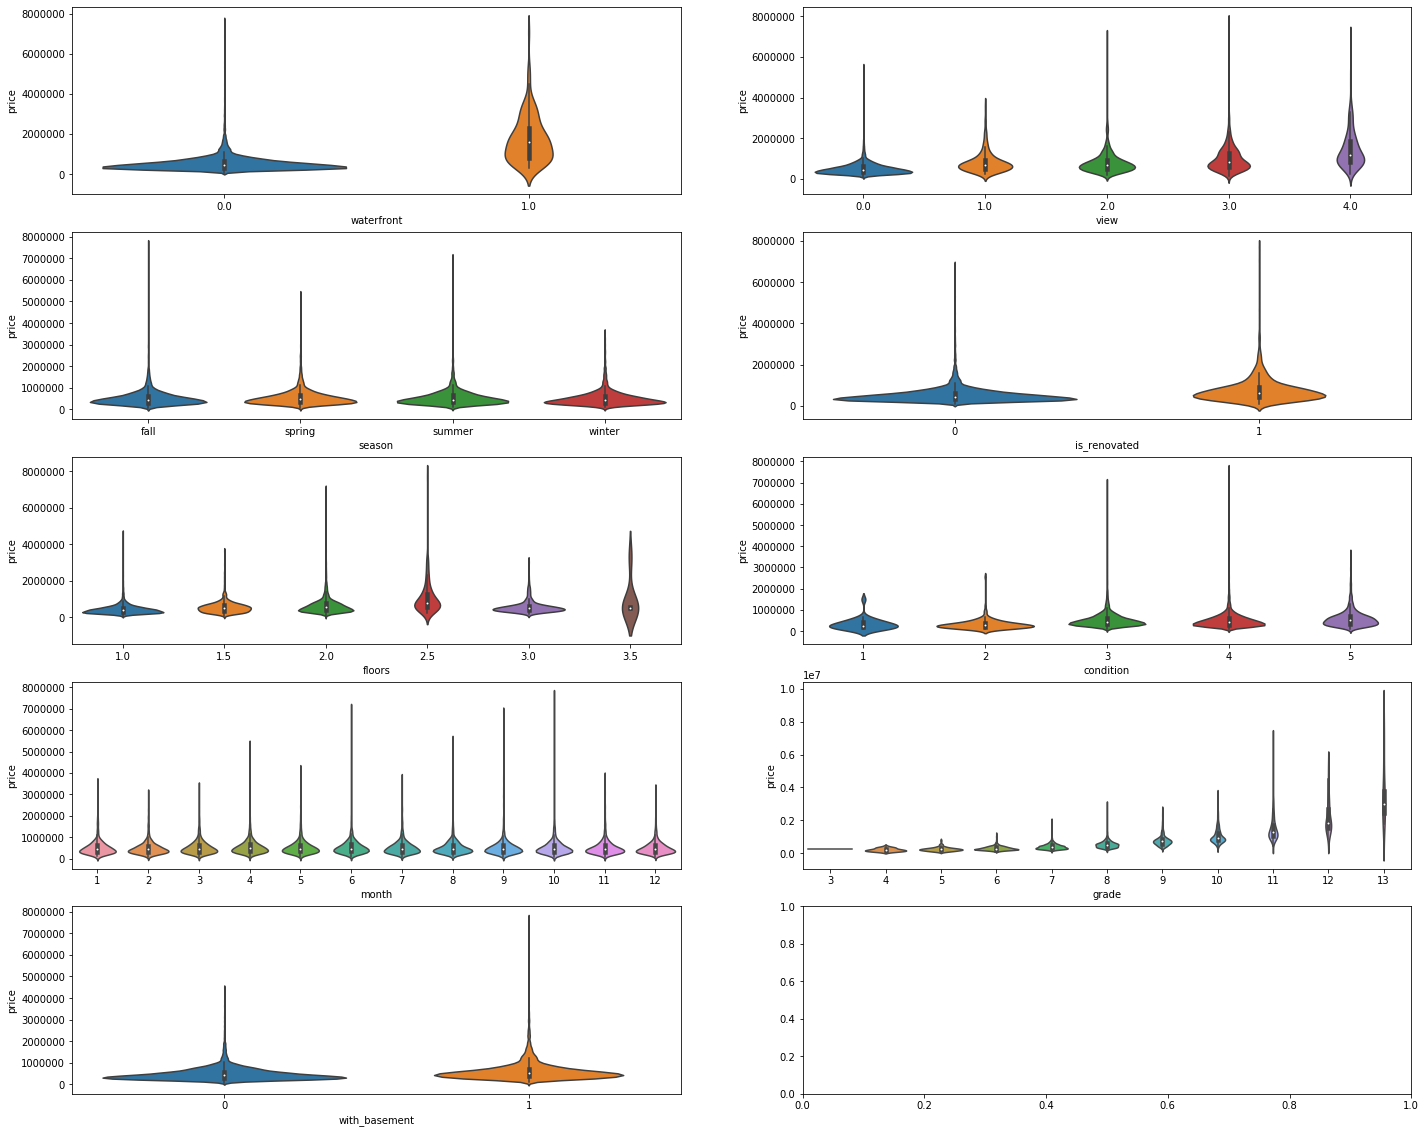

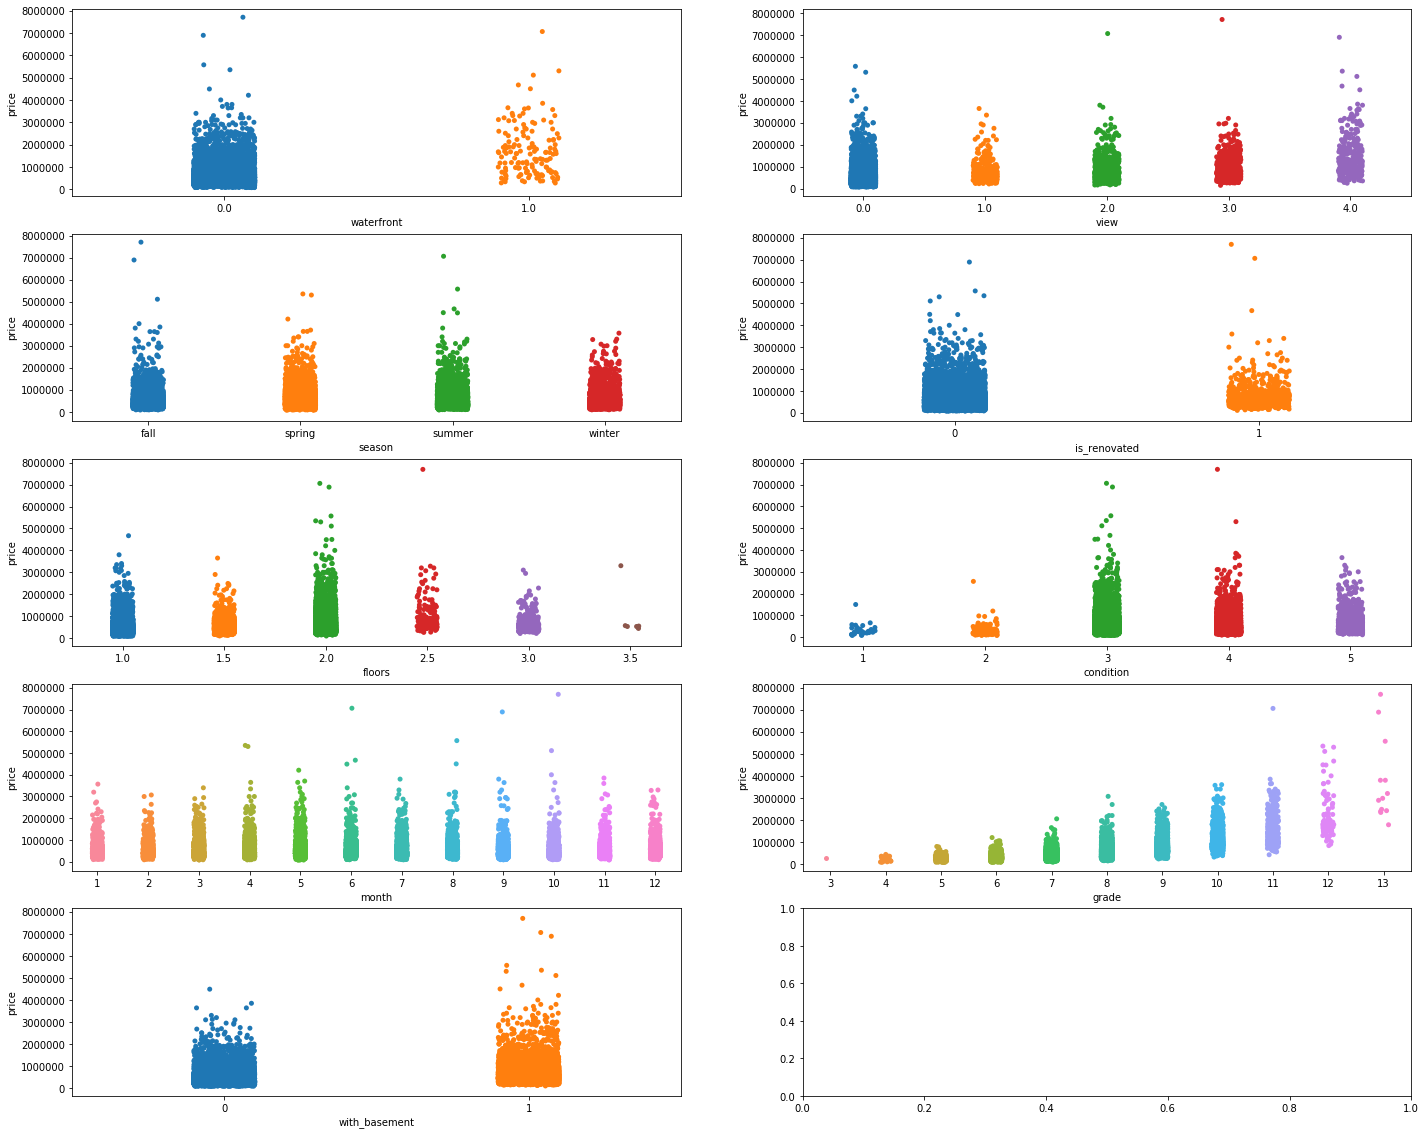

In [26]:
fig, ax1 = plt.subplots(5, 2, figsize=(24,20))
ax1 = ax1.flatten()
fig, ax2 = plt.subplots(5, 2, figsize=(24,20))
ax2 = ax2.flatten()
for c, col in enumerate(cat_col):
    
    sns.violinplot(x=col, y="price", data=df, ax=ax1[c]);
    sns.catplot(x=col, y="price", data=df, ax=ax2[c]);

    plt.close(3)
    plt.close(4)
    
plt.show()

Comments:

- Bedrooms: There is slight increase in median as the number of bedrooms increases. The house with 33 bedrooms should be dropped. After 6 bedroom the variance and house prices decreases.   
- Waterfront: The violin plot shows that houses with waterfront tend to have much higher median and better distribution compared to houses with no waterfront. After removing the outliers it may be a good predictor since the houses with waterfront tend to have higher prices.
- View: The median of the view slightly increases as the view number increases but houses with 0 view are sold more compared the rest of the views. Except view number 1, it has outliers in every view number. 
- Floor: Floor's median starts to decrease after the 2.5 floor. If we have a closer look  at the catplot 2.5 floor has outliers which increases the median of the floor. Actually, the floor data becomes less predictive after 2 floor.   
- Condition: The condition's interaction with price is not as expected. The median of condition shows slight increase as the condition increases. The prices are higher at condition 3 and condition 4 and interestingly lower at condition 5. 
- Season: The median value for each season are almost the same. While fall, spring and summer has a bunch of outliers, winter season doesn't have any. It is not a good a good predictor contrary to expectations. 
- Month: Like season, month doesn't show any clear linear relation with price. The median values remain almost same for each month. Overall prices tend to increase during June, September and October because of outliers. 
- Is_renovated:  Renovated houses' prices are seem to get higher due to outliers. Renovated houses have higher variance compared to not renovated houses.  
- Grade: Among other categorical variables, grade look like the most promising one. The median and the house prices increase as the grade increases. It has a clear linear relation with price. Not only variance but also price distribution changes across different grade values. This indicates grade feature's huge potential as a strong predictor. 

### Cleaning the Outliers

In [27]:
# Defining a function to clean outliers
def clean_outliers(df, col, iqr_denominator):
    
    # Calculating the IQR for the each column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR for column {col} is: {IQR}')
    
    df = df[~(
        (df[col] < (Q1 - iqr_denominator * IQR))
        |
        (df[col] > (Q3 + iqr_denominator * IQR))
    )]
    
    print(f'Number of rows after removing outliers: {df.shape[0]}')
    
    return df

In [28]:
# Applying the funtion
iqr_denominator = 3
con_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
df_cleaned = df.copy(deep=True)

for col in con_cols:
    df_cleaned = clean_outliers(df_cleaned, col, iqr_denominator)


IQR for column price is: 323000.0
Number of rows after removing outliers: 20728
IQR for column sqft_living is: 1090.0
Number of rows after removing outliers: 20697
IQR for column sqft_lot is: 5460.0
Number of rows after removing outliers: 19008
IQR for column sqft_above is: 910.0
Number of rows after removing outliers: 18995
IQR for column sqft_basement is: 540.0
Number of rows after removing outliers: 18982
IQR for column sqft_living15 is: 790.0
Number of rows after removing outliers: 18966
IQR for column sqft_lot15 is: 4269.0
Number of rows after removing outliers: 18753


In [29]:
df_cleaned.shape

(18753, 25)

In [30]:
# Removing the possible typo error
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].replace(33, 3)
df_cleaned['bedrooms'].unique()


array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [31]:
df_cleaned.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot floors waterfront view  ... yr_renovated zipcode      lat  \
0      5650    1.0        0.0  0.0  ...          0.0   98178  47.5112   
1      7242    2.0        0.0  0.0  ...       1991.0   98125  47.7210   
2     10000    1.0        0.0  0.0  ...          0.0   98028  47.7379   
3      5000    1.0        0.0  0.0  ...          0.0   98136  47.5208   
4      8080    1.0        0.0  0.0  ...          0.0   98074  47.6168   

      long  sqft_living15  sqft_lot15  month  season  is_renovated  \
0 -122.257           1340        5650     10    fall             0   
1 -122.319           1690        7639     12  winter             1   
2 -122.233           2720        8062      2  winter             0   
3 -122.393           1360        5000     12  winter             0   
4 -122.045           1800        7503      2  winter             0   

   with_basement  
0              0  
1              1  
2              0  
3              1  
4              0  

[5 rows x 25 columns]

In [32]:
# Creating dummy variable for categorical data
df_cleaned_view_dummy = pd.get_dummies(df_cleaned['view'], prefix='vw', drop_first=True)
df_cleaned_condition_dummy = pd.get_dummies(df_cleaned['condition'], prefix='condition', drop_first=True)
df_cleaned_floors_dummy = pd.get_dummies(df_cleaned['floors'], prefix='floor')
df_cleaned_floors_dummy.drop(columns=['floor_3.5'], inplace=True)
df_cleaned_season_dummy = pd.get_dummies(df_cleaned['season'])
df_cleaned_season_dummy.drop(columns = ['winter'], inplace=True)
df_cleaned_season_dummy.head()
df_cleaned_grade_dummy=pd.get_dummies(df_cleaned['grade'], prefix='gr')
df_cleaned_grade_dummy.drop(columns = ['gr_13'], inplace=True)


In [33]:
# Cleaning the column names
df_cleaned_view_dummy.rename(columns={
    'vw_1.0':'vw_1',
    'vw_2.0': 'vw_2',
    'vw_3.0': 'vw_3',
    'vw_4.0': 'vw_4'
}, inplace=True)
display(df_cleaned_view_dummy.head())

df_cleaned_floors_dummy.rename(columns={
    'floor_1.0': 'floor_1',
    'floor_1.5':'floor_1_5',
    'floor_2.0': 'floor_2',
    'floor_2.5': 'floor_2_5',
    'floor_3.0': 'floor_3'
}, inplace=True)
df_cleaned_floors_dummy.head()

vw_1  vw_2  vw_3  vw_4
0     0     0     0     0
1     0     0     0     0
2     0     0     0     0
3     0     0     0     0
4     0     0     0     0

floor_1  floor_1_5  floor_2  floor_2_5  floor_3
0        1          0        0          0        0
1        0          0        1          0        0
2        1          0        0          0        0
3        1          0        0          0        0
4        1          0        0          0        0

The columns 'lat', 'long' and 'zipcode' are separated for further analysis to observe the effect of location on house prices.  

In [34]:
df_cat = pd.concat(
    [
        df_cleaned_view_dummy,
        df_cleaned_condition_dummy,
        df_cleaned_floors_dummy,
        df_cleaned_season_dummy,
        df_cleaned['is_renovated'],
        df_cleaned['waterfront'],
        df_cleaned_grade_dummy
    ], axis = 1)

df_cat.head()

vw_1  vw_2  vw_3  vw_4  condition_2  condition_3  condition_4  condition_5  \
0     0     0     0     0            0            1            0            0   
1     0     0     0     0            0            1            0            0   
2     0     0     0     0            0            1            0            0   
3     0     0     0     0            0            0            0            1   
4     0     0     0     0            0            1            0            0   

   floor_1  floor_1_5  ...  gr_3  gr_4  gr_5  gr_6  gr_7  gr_8 gr_9 gr_10  \
0        1          0  ...     0     0     0     0     1     0    0     0   
1        0          0  ...     0     0     0     0     1     0    0     0   
2        1          0  ...     0     0     0     1     0     0    0     0   
3        1          0  ...     0     0     0     0     1     0    0     0   
4        1          0  ...     0     0     0     0     0     1    0     0   

   gr_11  gr_12  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 28 columns]

In [35]:
df_con = df_cleaned[
    [
        'price',
        'sqft_living',
        'sqft_lot',
        'sqft_above',
        'sqft_basement',
        'sqft_living15',
        'sqft_lot15', 
        'bathrooms',
        'yr_built'
    ]
].astype(float).copy(deep=True)

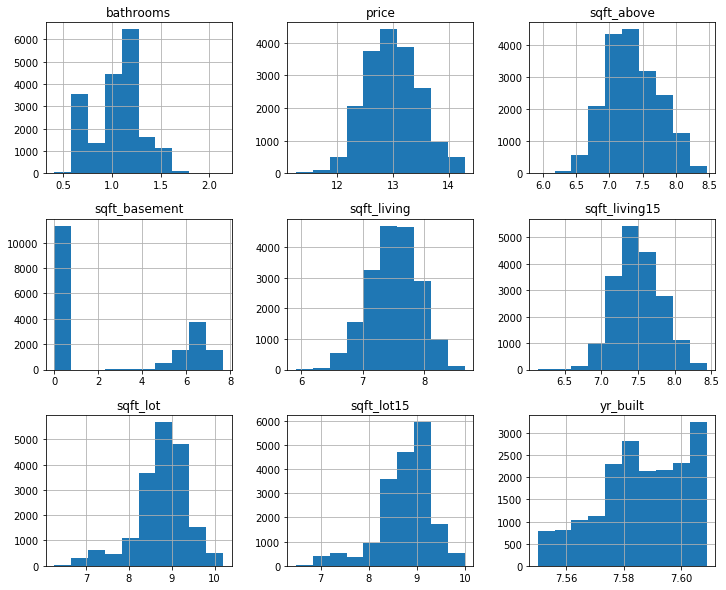

In [36]:
import numpy as np
df_log = (np.log1p(df_con)).replace(-np.inf, 0)
df_log.hist(figsize=(12,10))
plt.show()

### Checking for Multicollinearity

In [37]:
df_corr = df.iloc[:,3:24].corr()
df_corr

bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
bedrooms       1.000000   0.513840     0.577998  0.032262    0.479210   
bathrooms      0.513840   1.000000     0.755278  0.087884    0.686456   
sqft_living    0.577998   0.755278     1.000000  0.172941    0.876678   
sqft_lot       0.032262   0.087884     0.172941  1.000000    0.183461   
sqft_above     0.479210   0.686456     0.876678  0.183461    1.000000   
sqft_basement  0.302683   0.282693     0.434576  0.015533   -0.052293   
yr_built       0.157017   0.508408     0.319461  0.052768    0.425180   
yr_renovated   0.018452   0.047955     0.049964  0.004182    0.019535   
zipcode       -0.152628  -0.204306    -0.198906 -0.129355   -0.260814   
lat           -0.009521   0.024994     0.052986 -0.085457   -0.000346   
long           0.131093   0.224479     0.240797  0.230583    0.344543   
sqft_living15  0.392476   0.570129     0.756389  0.143428    0.731016   
sqft_lot15     0.030479   0.088834     0.184466  0.720649    0.195638   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
bedrooms            0.302683  0.157017      0.018452 -0.152628 -0.009521   
bathrooms           0.282693  0.508408      0.047955 -0.204306  0.024994   
sqft_living         0.434576  0.319461      0.049964 -0.198906  0.052986   
sqft_lot            0.015533  0.052768      0.004182 -0.129355 -0.085457   
sqft_above         -0.052293  0.425180      0.019535 -0.260814 -0.000346   
sqft_basement       1.000000 -0.132844      0.067145  0.075381  0.110637   
yr_built           -0.132844  1.000000     -0.200377 -0.347320 -0.148725   
yr_renovated        0.067145 -0.200377      1.000000  0.061752  0.029435   
zipcode             0.075381 -0.347320      0.061752  1.000000  0.267070   
lat                 0.110637 -0.148725      0.029435  0.267070  1.000000   
long               -0.145174  0.409317     -0.064200 -0.564092 -0.135183   
sqft_living15       0.201579  0.325447      0.001286 -0.278006  0.050441   
sqft_lot15          0.016660  0.071408      0.002708 -0.146709 -0.084984   

                   long  sqft_living15  sqft_lot15  
bedrooms       0.131093       0.392476    0.030479  
bathrooms      0.224479       0.570129    0.088834  
sqft_living    0.240797       0.756389    0.184466  
sqft_lot       0.230583       0.143428    0.720649  
sqft_above     0.344543       0.731016    0.195638  
sqft_basement -0.145174       0.201579    0.016660  
yr_built       0.409317       0.325447    0.071408  
yr_renovated  -0.064200       0.001286    0.002708  
zipcode       -0.564092      -0.278006   -0.146709  
lat           -0.135183       0.050441   -0.084984  
long           1.000000       0.334270    0.255557  
sqft_living15  0.334270       1.000000    0.183089  
sqft_lot15     0.255557       0.183089    1.000000

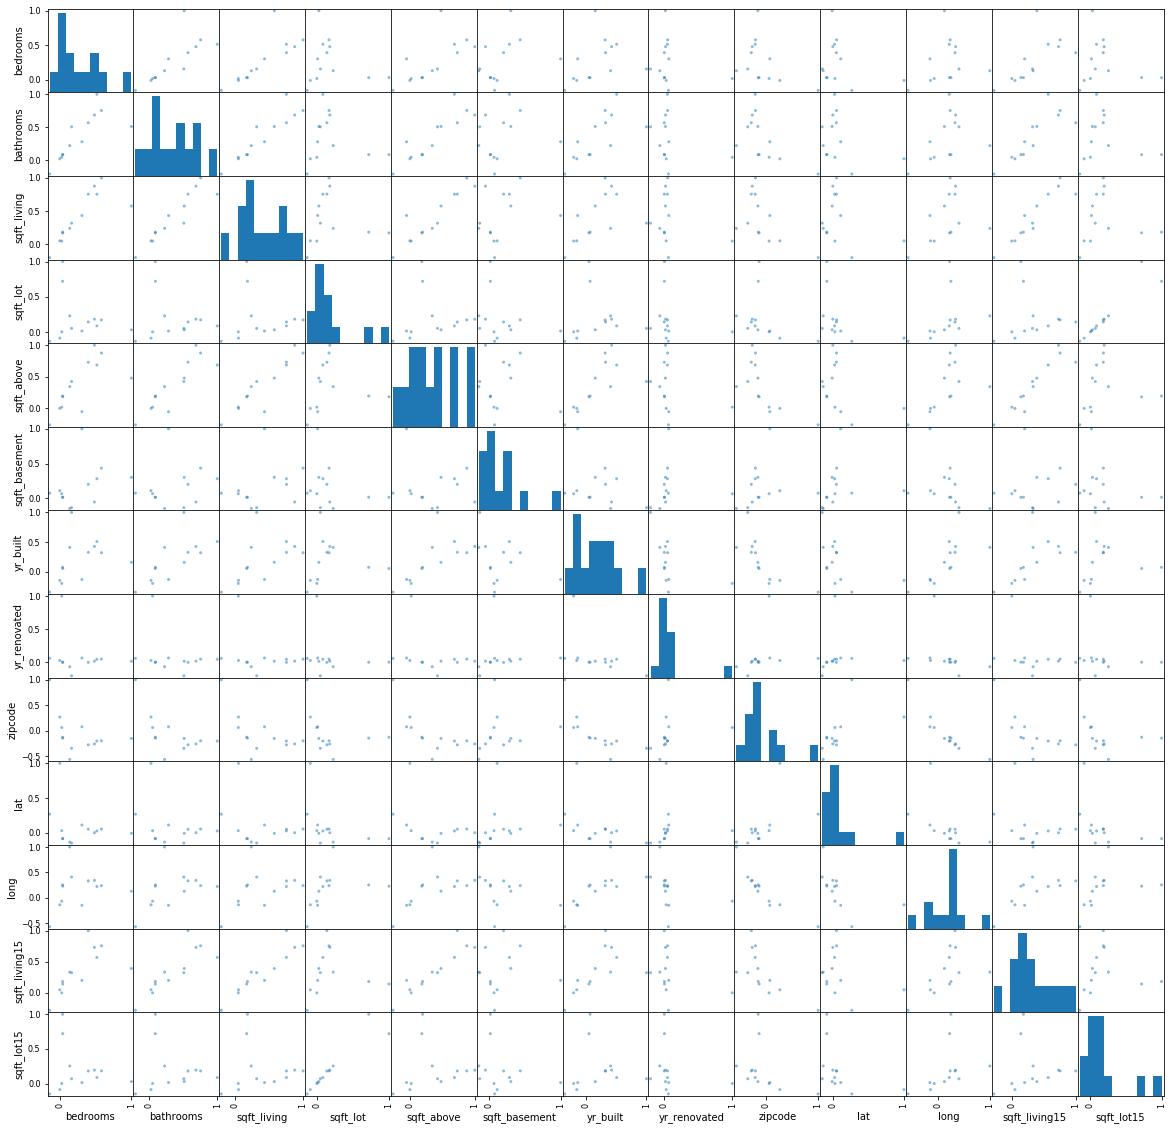

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 
pd.plotting.scatter_matrix(df_corr,figsize  = [20, 20]);
plt.show()

In [39]:
abs(df_corr) > 0.75

bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
bedrooms           True      False        False     False       False   
bathrooms         False       True         True     False       False   
sqft_living       False       True         True     False        True   
sqft_lot          False      False        False      True       False   
sqft_above        False      False         True     False        True   
sqft_basement     False      False        False     False       False   
yr_built          False      False        False     False       False   
yr_renovated      False      False        False     False       False   
zipcode           False      False        False     False       False   
lat               False      False        False     False       False   
long              False      False        False     False       False   
sqft_living15     False      False         True     False       False   
sqft_lot15        False      False        False     False       False   

               sqft_basement  yr_built  yr_renovated  zipcode    lat   long  \
bedrooms               False     False         False    False  False  False   
bathrooms              False     False         False    False  False  False   
sqft_living            False     False         False    False  False  False   
sqft_lot               False     False         False    False  False  False   
sqft_above             False     False         False    False  False  False   
sqft_basement           True     False         False    False  False  False   
yr_built               False      True         False    False  False  False   
yr_renovated           False     False          True    False  False  False   
zipcode                False     False         False     True  False  False   
lat                    False     False         False    False   True  False   
long                   False     False         False    False  False   True   
sqft_living15          False     False         False    False  False  False   
sqft_lot15             False     False         False    False  False  False   

               sqft_living15  sqft_lot15  
bedrooms               False       False  
bathrooms              False       False  
sqft_living             True       False  
sqft_lot               False       False  
sqft_above             False       False  
sqft_basement          False       False  
yr_built               False       False  
yr_renovated           False       False  
zipcode                False       False  
lat                    False       False  
long                   False       False  
sqft_living15           True       False  
sqft_lot15             False        True

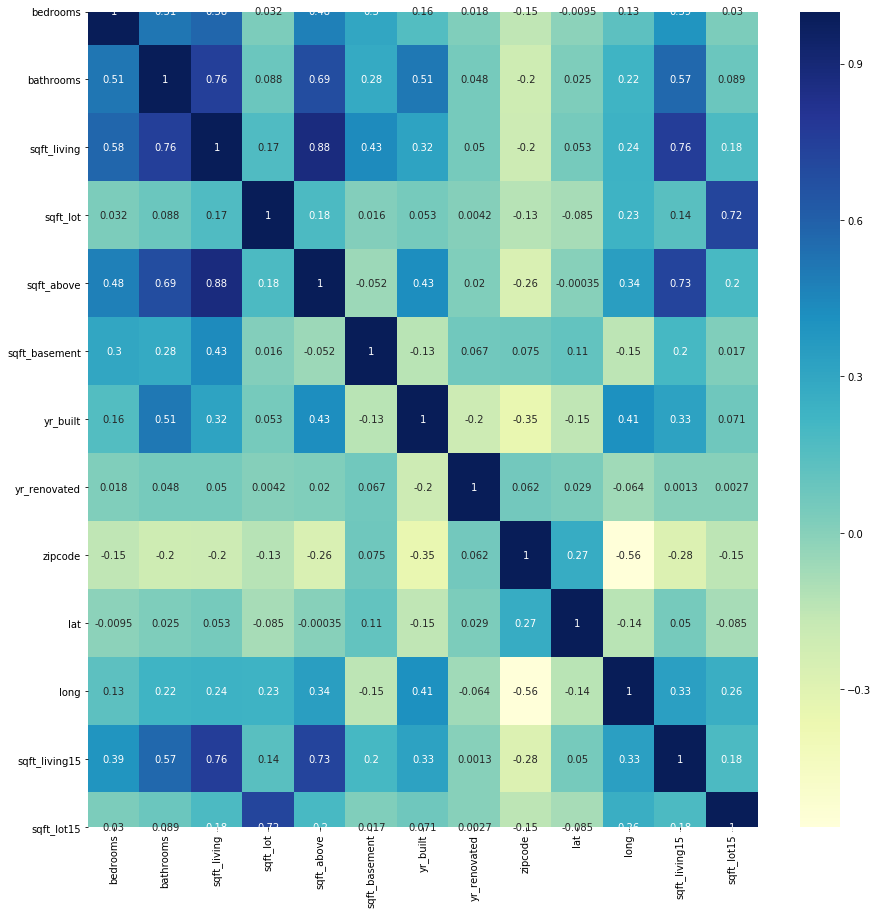

In [40]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df_corr, cmap="YlGnBu", annot=True);

### Inspecting Linearity Assumptions

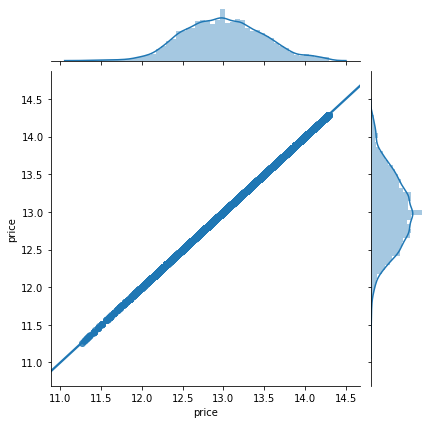

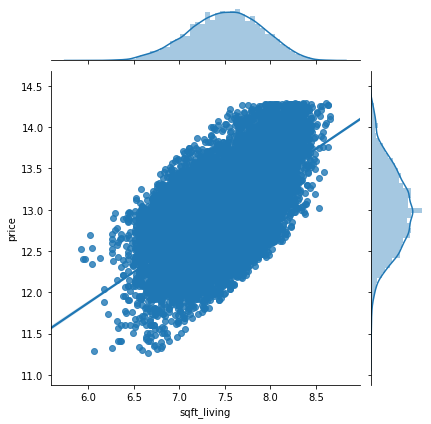

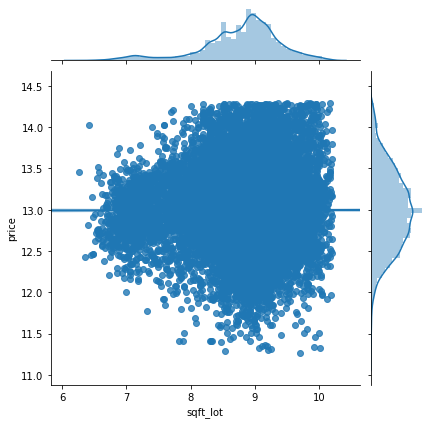

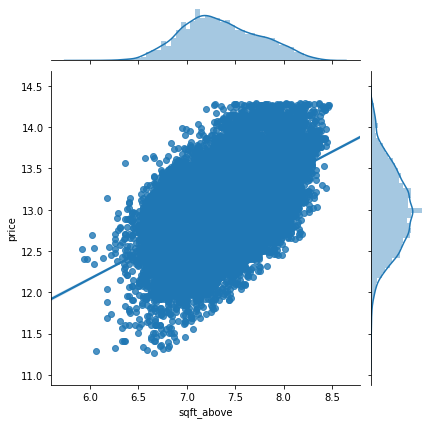

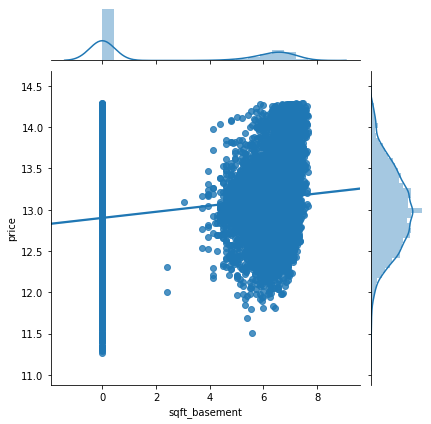

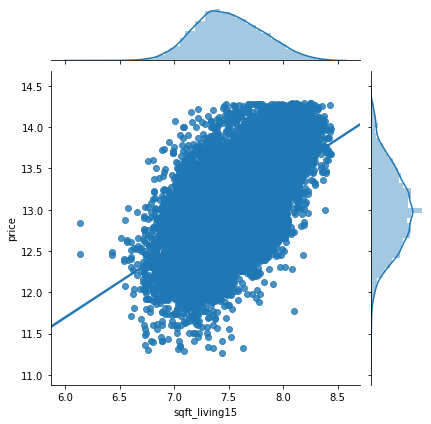

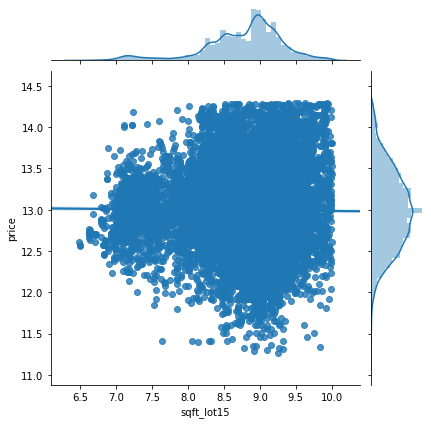

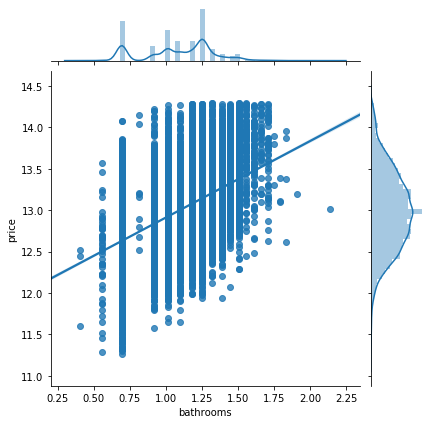

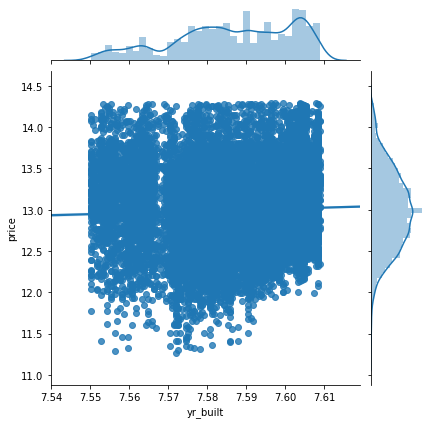

In [41]:
for col in df_log.columns:
    sns.jointplot(col, 'price', data=df_log, kind='reg');

### How Does Location Affect House Prices?What Are the Top Five Zip codes ?

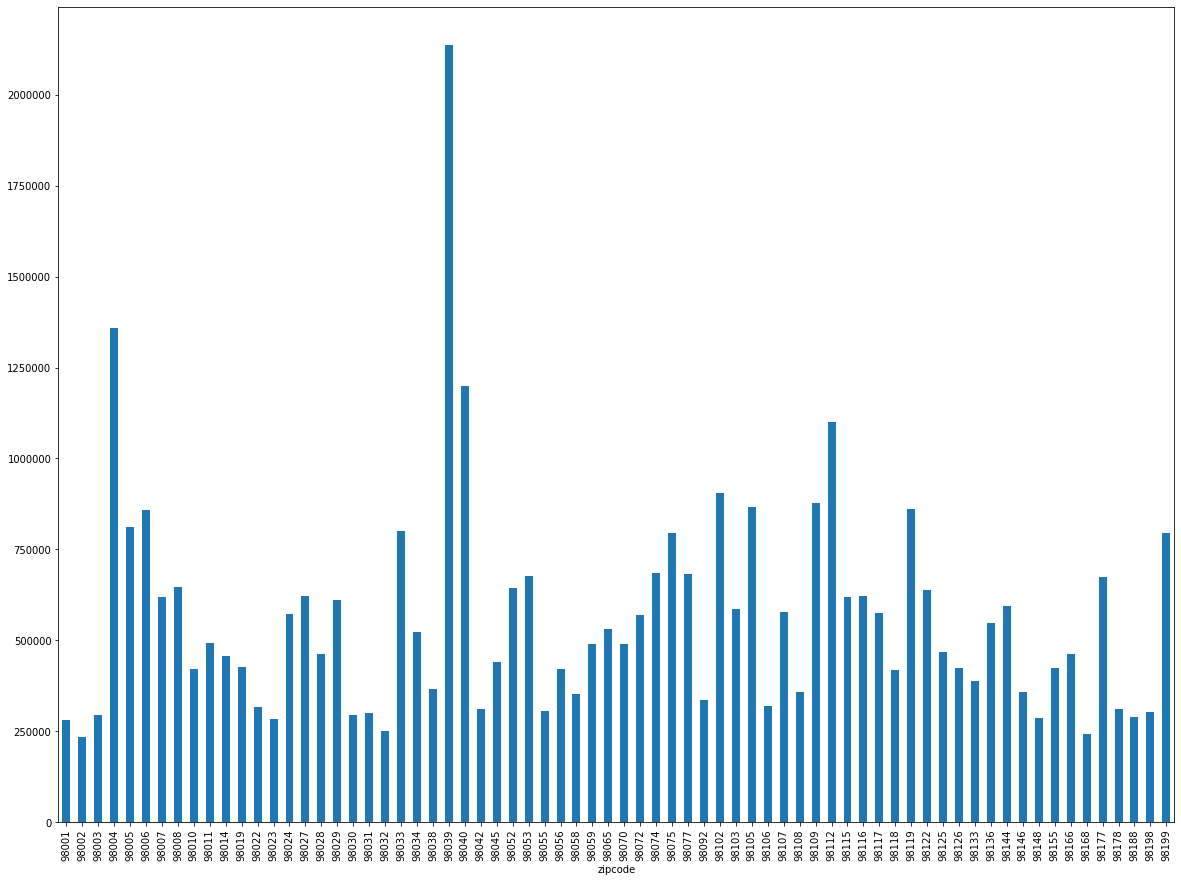

In [42]:
fig, ax = plt.subplots(figsize=(20,15))
df.groupby('zipcode')['price'].mean().plot.bar()
plt.show()

To visualize the most expensive areas of King county, first longitude and latitude data used with a scatter plot. Here it can be observed that in general northern part of the city and the houses surrounding Lake Washington has higher prices. Again, to search the top 5 zip codes with the highest mean price, an open source data 'zipcode_king_county.geojson' is loaded to work with follium. 

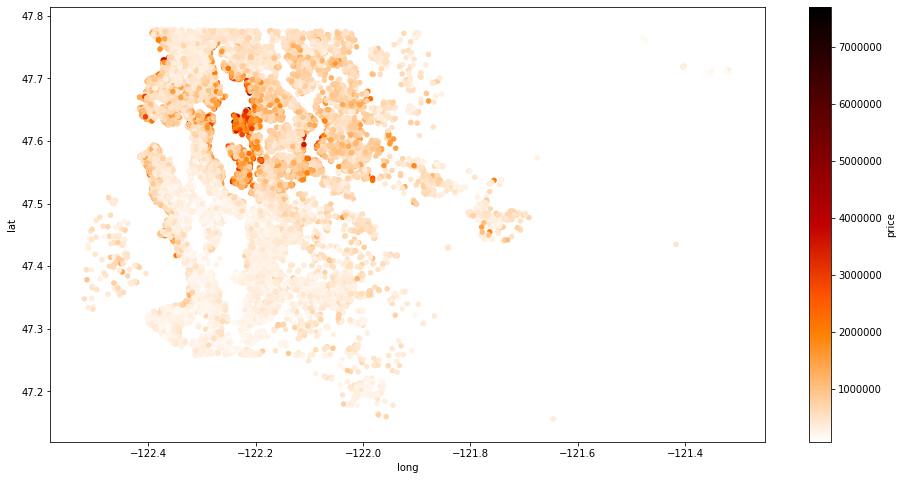

In [43]:

df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.show();

In [44]:
import json
# Calculating each zipcodes price mean
df_geo = df.groupby('zipcode')[['price']].mean().reset_index()
df_geo['zipcode'] = df_geo['zipcode'].astype(str)

# loading the data
king_county_geo = 'zipcode_king_county.geojson'
with open(king_county_geo, 'r') as j:
    geo_data = json.load(j)
    
# Reaching the zipcodes
tmp = geo_data
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['ZCTA5CE10'] in list(df_geo['zipcode'].unique()):
        geozips.append(tmp['features'][i])
        
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

with open("king_county_new_geodata.json", "w") as new_file:
    new_file.write(json.dumps(
        new_json,
        sort_keys=True,
        indent=4, separators=(',', ': '),
    )
                  )

In [45]:
# Creating a heatmap with the help of follium 
import folium

king_county = 'king_county_new_geodata.json'
m = folium.Map(
    location=[47.36, -121.89],
    zoom_start=8,
    detect_retina=True,
    control_scale=False,
#     tiles='Stamen Toner',
)

folium.Choropleth(
    geo_data=king_county_geo,
    name='choropleth',
    data=df_geo,
    columns=['zipcode', 'price'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average price'
).add_to(m)

folium.LayerControl().add_to(m)

m

The top 5 zip codes by mean price are 98039, 98004, 98040, 98112 and 98102. Let's see whether the top 5 zip codes will match with the most expensive areas. 




In [46]:

zipcode_list = [[47.6172, -122.230, 98039], [47.6312, -122.223, 98040], [47.5316, -122.233, 98040], [47.6440, -122.319, 98102], [47.6362, -122.302, 98112]]

for z in zipcode_list:
    lat = z[0]
    long = z[1]
    name = z[2]
    marker = folium.Marker(location=[lat, long], popup=name)
    marker.add_to(m)
m

In [47]:
# 
zipped = list(zip(df.lat, df.long))
zipped

[(47.5112, -122.257),
 (47.721000000000004, -122.319),
 (47.7379, -122.23299999999999),
 (47.5208, -122.39299999999999),
 (47.6168, -122.045),
 (47.6561, -122.005),
 (47.4095, -122.315),
 (47.5123, -122.337),
 (47.3684, -122.031),
 (47.6007, -122.145),
 (47.69, -122.292),
 (47.7558, -122.229),
 (47.6127, -122.045),
 (47.67, -122.39399999999999),
 (47.5714, -122.375),
 (47.7277, -121.962),
 (47.6648, -122.34299999999999),
 (47.3343, -122.306),
 (47.7025, -122.34100000000001),
 (47.5316, -122.23299999999999),
 (47.3266, -122.169),
 (47.3533, -122.166),
 (47.3739, -122.17200000000001),
 (47.3048, -122.21799999999999),
 (47.6386, -122.36),
 (47.6221, -122.314),
 (47.695, -122.304),
 (47.7073, -122.11),
 (47.5391, -122.07),
 (47.7274, -122.35700000000001),
 (47.6823, -122.368),
 (47.6889, -122.375),
 (47.4276, -122.15700000000001),
 (47.6827, -122.31),
 (47.6621, -122.132),
 (47.6702, -122.36200000000001),
 (47.3341, -122.28200000000001),
 (47.5301, -122.18),
 (47.6145, -122.027),
 (47.445,

In [80]:
new = []
for z in zipped:

    if (z[0] >= 47.5) & (z[1] <= -122.1):
        new.append('NW')
    elif (z[0] >= 47.5) & (z[1] > -122.1):
        new.append('NE')
    elif (z[0] < 47.5) & (z[1] <= -122.1):
        new.append('SW')
    else:
        new.append('SE')

new[:10]

['NW', 'NW', 'NW', 'NW', 'NE', 'NE', 'SW', 'NW', 'SE', 'NW']

In [49]:
df['direction'] = new

df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot floors waterfront view  ... zipcode      lat     long  \
0      5650    1.0        0.0  0.0  ...   98178  47.5112 -122.257   
1      7242    2.0        0.0  0.0  ...   98125  47.7210 -122.319   
2     10000    1.0        0.0  0.0  ...   98028  47.7379 -122.233   
3      5000    1.0        0.0  0.0  ...   98136  47.5208 -122.393   
4      8080    1.0        0.0  0.0  ...   98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  month  season  is_renovated  with_basement  \
0           1340        5650     10    fall             0              0   
1           1690        7639     12  winter             1              1   
2           2720        8062      2  winter             0              0   
3           1360        5000     12  winter             0              1   
4           1800        7503      2  winter             0              0   

   direction  
0         NW  
1         NW  
2         NW  
3         NW  
4         NE  

[5 rows x 26 columns]

In [50]:
df[df['direction']=='SW'].head(50)

id       date      price  bedrooms  bathrooms  sqft_living  \
7    2008000270 2015-01-15   291850.0         3       1.50         1060   
19   7983200060 2015-04-24   230000.0         3       1.00         1250   
22   7137970340 2014-07-03   285000.0         5       2.50         2270   
23   8091400200 2014-05-16   252700.0         2       1.50         1070   
24   3814700200 2014-11-20   329000.0         3       2.25         2450   
25   1202000200 2014-11-03   233000.0         3       2.00         1710   
34   7955080270 2014-12-03   322500.0         4       2.75         2060   
38   7895500070 2015-02-13   240000.0         4       1.00         1220   
41   7766200013 2014-08-11   775000.0         4       2.25         4220   
44   1432701230 2014-07-29   309000.0         3       1.00         1280   
46   8945200830 2015-03-25   210490.0         3       1.00          990   
49    822039084 2015-03-11  1350000.0         3       2.50         2753   
50   5245600105 2014-09-16   228000.0         3       1.00         1190   
51   7231300125 2015-02-17   345000.0         5       2.50         3150   
56   9478500640 2014-08-19   292500.0         4       2.50         2250   
57   2799800710 2015-04-07   301000.0         3       2.50         2420   
60   1516000055 2014-12-10   650000.0         3       2.25         2150   
61   9558200045 2014-08-28   289000.0         3       1.75         1260   
62   5072410070 2014-10-21   505000.0         3       1.75         2519   
67   3717000160 2014-10-09   287000.0         4       2.50         2240   
68   1274500060 2014-08-25   204000.0         3       1.00         1000   
83   1523059105 2015-01-28   356000.0         3       1.50         1680   
86   2599001200 2014-11-03   305000.0         5       2.25         2660   
90   2791500270 2014-05-22   243500.0         4       2.50         1980   
92   4168000060 2015-02-26   153000.0         3       1.00         1200   
96   3422049190 2015-03-30   247500.0         3       1.75         1960   
97   1099611230 2014-09-12   199000.0         4       1.50         1160   
104  6197800045 2014-09-24   290000.0         3       1.00         1210   
105  1328310370 2015-04-02   375000.0         3       2.50         2340   
107  3530510041 2014-07-23   188500.0         2       1.75         1240   
114  8961960160 2014-10-28   480000.0         4       2.50         3230   
118  3454800060 2015-01-08   171800.0         4       2.00         1570   
127  8732020310 2014-07-17   260000.0         4       2.25         2160   
130  3668000070 2015-01-05   212000.0         3       1.75         1060   
135   921049315 2014-08-13   199000.0         3       1.75         1320   
136  3655000070 2014-08-05   220000.0         4       1.75         2020   
142  1432900240 2015-05-08   205000.0         3       1.00         1610   
148  8075400570 2014-10-30   258000.0         5       2.00         2260   
152   537000445 2015-03-31   282950.0         3       1.00         1250   
155  8960000030 2014-07-28   215000.0         3       1.00         1180   
157  8731900200 2014-08-07   320000.0         4       2.75         2640   
159  1081200350 2014-10-03   320000.0         4       1.75         1760   
160    84000105 2014-05-07   255000.0         5       2.25         2060   
166  2009000370 2015-02-19   269950.0         2       1.75         1340   
170  4330600435 2015-03-16   284000.0         3       1.75         1560   
171  9542800700 2015-01-02   272000.0         3       1.75         2160   
180  3830630310 2014-07-25   260000.0         3       2.50         1670   
186  8731951370 2015-04-15   269000.0         4       1.75         1490   
191  1432600560 2014-11-05   166950.0         3       1.00         1190   
195  7796450200 2014-05-15   256883.0         3       2.50         1690   

     sqft_lot floors waterfront view  ... zipcode      lat     long  \
7        9711    1.0        0.0  0.0  ...   98198  47.4095 -122.315   
19       9774    1.0        0.0  0.0  ...   9

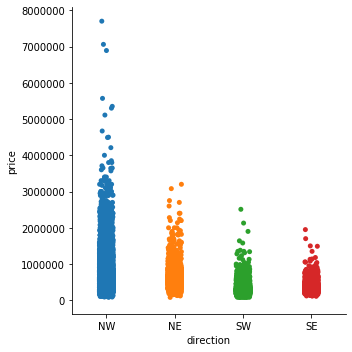

In [87]:
sns.catplot(x='direction', y='price', data=df);

In [ ]:

sns.catplot(y="price", hue="direction", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

### Which Season and Month Are Best to Buy A House?

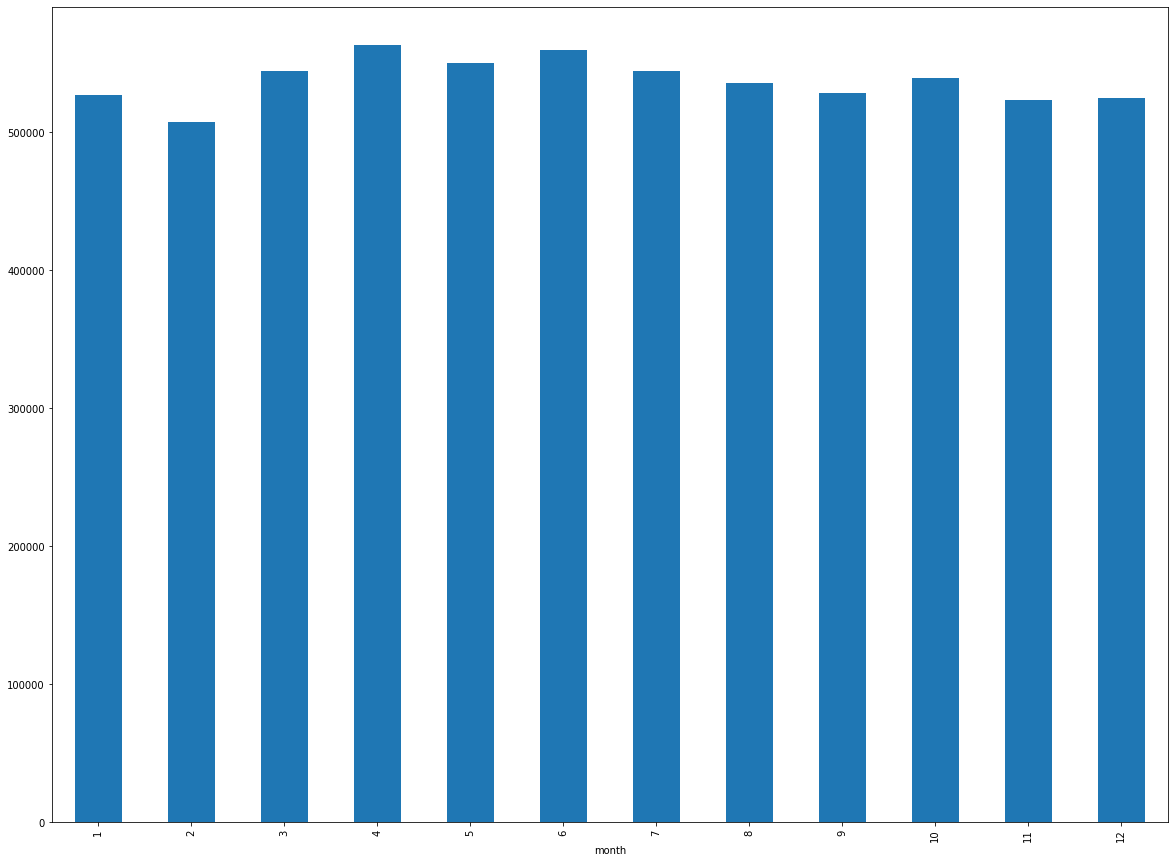

In [53]:
fig, ax = plt.subplots(figsize=(20,15))
df.groupby('month')['price'].mean().plot.bar()
plt.show()

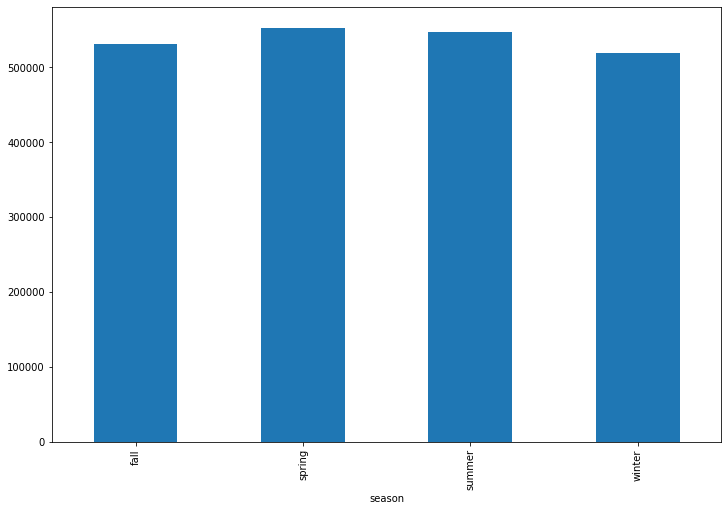

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('season')['price'].mean().plot.bar()
plt.show()

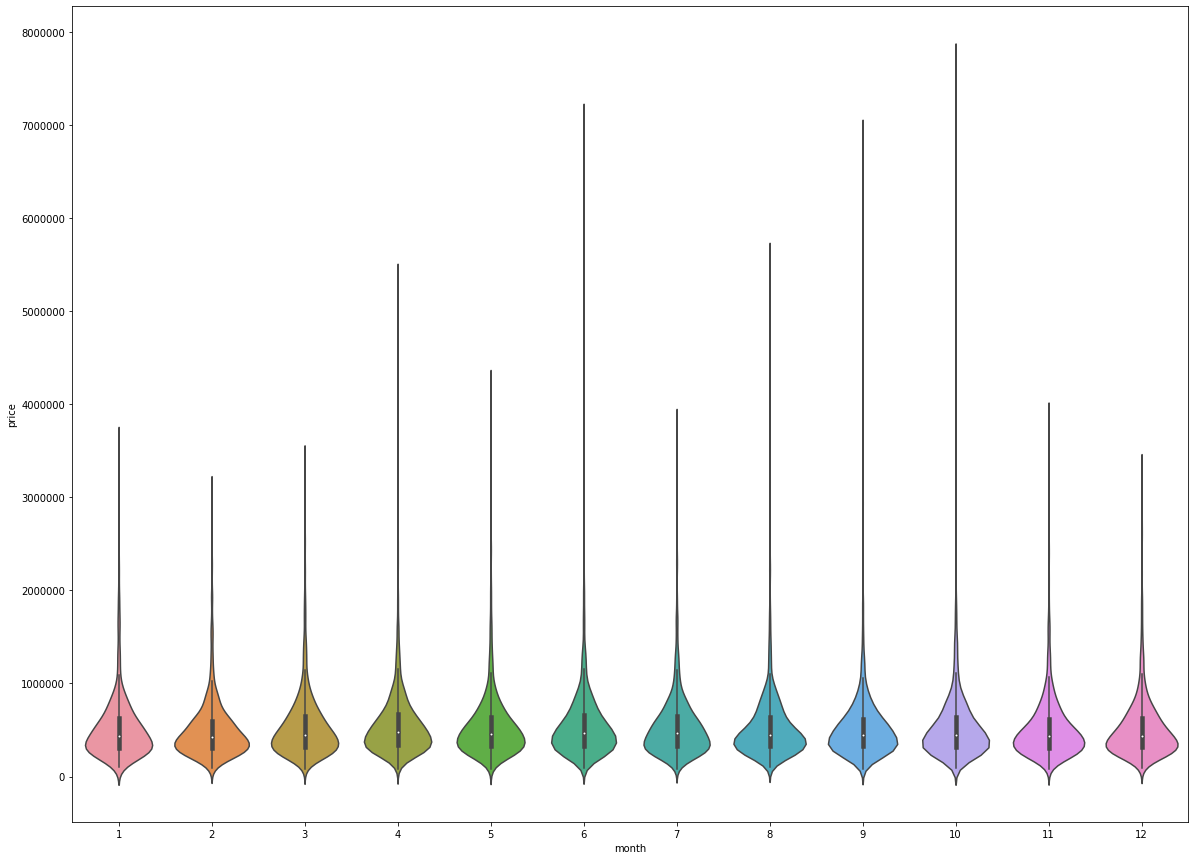

In [55]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.violinplot(x="month", y='price', data=df)

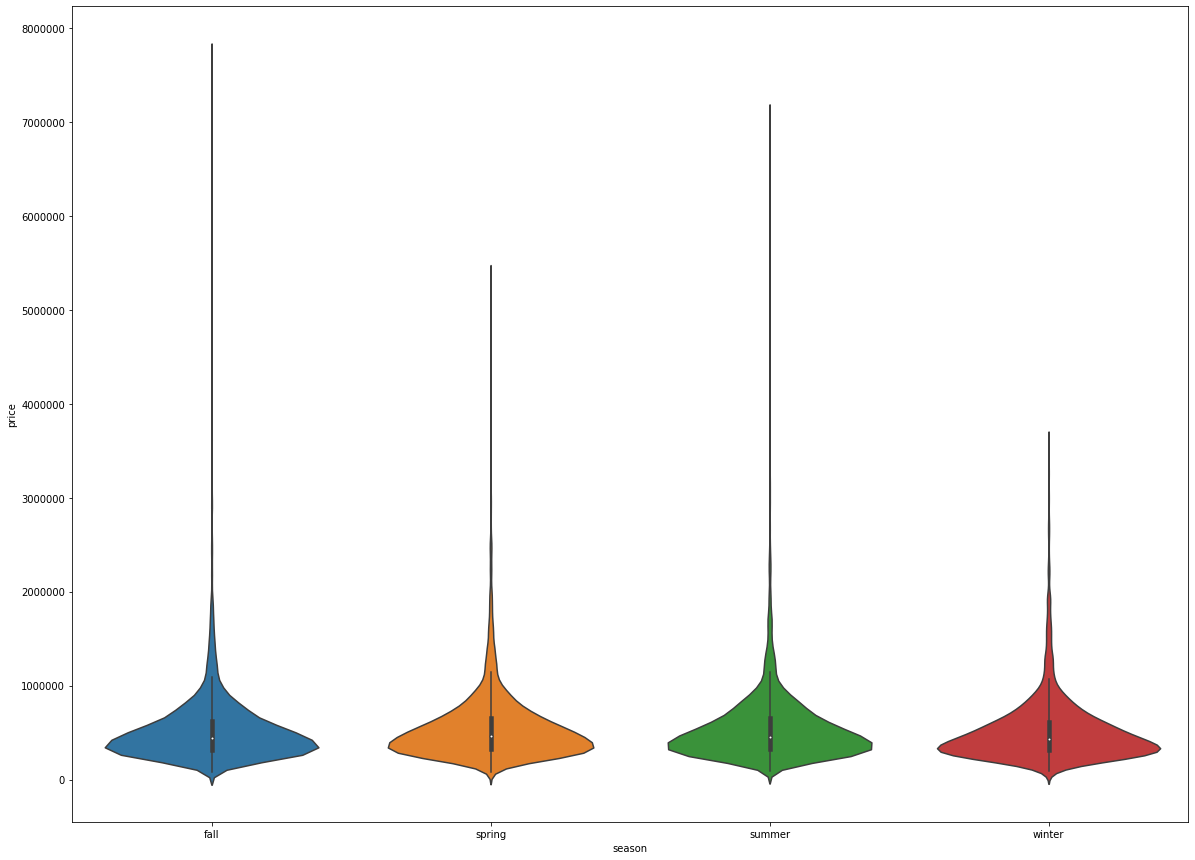

In [56]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.violinplot(x="season", y='price', data=df)

## Modelling the Data

In [57]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# cols = ['price', 'sqft_lot', 'floors', 'condition',
#        'grade', 'sqft_above', 'sqft_basement', 
#         'sqft_living15', 'sqft_lot15']
# df_log[cols] = scaler.fit_transform(df_log[cols])

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

In [59]:
df_final = pd.concat([df_cat, df_log, df_cleaned['bedrooms']], axis=1)
df_final.columns

Index(['vw_1', 'vw_2', 'vw_3', 'vw_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floor_1', 'floor_1_5', 'floor_2',
       'floor_2_5', 'floor_3', 'fall', 'spring', 'summer', 'is_renovated',
       'waterfront', 'gr_3', 'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9',
       'gr_10', 'gr_11', 'gr_12', 'price', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'bathrooms', 'yr_built', 'bedrooms'],
      dtype='object')

### Cerating a Baseline Model

In [60]:
from statsmodels.tools.tools import add_constant

outcome = 'price'
predictors = ['vw_1', 'vw_2', 'vw_3', 'vw_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floor_1', 'floor_1_5', 'floor_2',
       'floor_2_5', 'floor_3', 'fall', 'spring', 'summer', 'is_renovated',
       'waterfront', 'gr_3', 'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9',
       'gr_10', 'gr_11', 'gr_12', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'bathrooms', 'yr_built', 'bedrooms']
        
df_final = add_constant(df_final)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum
model = ols(formula=formula, data=df_final).fit()
model.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     850.1
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:15:07   Log-Likelihood:                -3725.7
No. Observations:               18753   AIC:                             7525.
Df Residuals:                   18716   BIC:                             7815.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            85.1894      1.582     53.860      0.000      82.089      88.290
is_renovated[T.1]     0.0399      0.013      3.026      0.002       0.014       0.066
waterfront[T.1.0]     0.3517      0.051      6.891      0.000       0.252       0.452
vw_1                  0.1211      0.018      6.738      0.000       0.086       0.156
vw_2                  0.0739      0.011      6.556      0.000       0.052       0.096
vw_3                  0.1046      0.016      6.396      0.000       0.073       0.137
vw_4                  0.2055      0.027      7.665      0.000       0.153       0.258
condition_2           0.0393      0.067      0.587      0.557      -0.092       0.171
condition_3           0.1869      0.062      3.005      0.003       0.065       0.309
condition_4           0.2206      0.062      3.545      0.000       0.099       0.343
condition_5           0.2871      0.063      4.589      0.000       0.164       0.410
floor_1              -0.1297      0.121     -1.069      0.285      -0.368       0.108
floor_1_5            -0.1382      0.121     -1.138      0.255      -0.376       0.100
floor_2              -0.1404      0.121     -1.160      0.246      -0.377       0.097
floor_2_5            -0.1259      0.124     -1.016      0.309      -0.369       0.117
floor_3              -0.0137      0.121     -0.113      0.910      -0.251       0.224
fall                  0.0025      0.007      0.366      0.715      -0.011       0.016
spring                0.0510      0.007      7.819      0.000       0.038       0.064
summer                0.0160      0.007      2.428      0.015       0.003       0.029
gr_3                  8.2664      0.311     26.570      0.000       7.657       8.876
gr_4                  7.8994      0.170     46.337      0.000       7.565       8.234
gr_5                  7.9529      0.160     49.628      0.000       7.639       8.267
gr_6                  8.1490      0.160     50.835      0.000       7.835       8.463
gr_7                  8.3485      0.161     51.716      0.000       8.032       8.665
gr_8                  8.5397      0.162     52.712      0.000       8.222       8.857
gr_9                  8.7886      0.162     54.104      0.000       8.470       9.107
gr_10                 8.9555      0.163     55.074      0.000       8.637       9.274
gr_11                 9.0870      0.164     55.509      0.000       8.766       9.408
gr_12                 9.2024      0.191     48.055      0.000       8.827       9.578
sqft_living           0.1512      0.027      5.612      0.000       0.098       0.204
sqft_lot             -0.0692      0.009     -7.881      0.000      -0.086      -0.052
sqft_above            0.2044      0.027      7.691      0.000       0.152       0.257
sqft_basement         0.0175      0.002      9.855      0.000       0.014

In [61]:
['vw_1', 'vw_2', 'vw_3', 'vw_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floor_1', 'floor_1_5', 'floor_2',
       'floor_2_5', 'floor_3', 'fall', 'spring', 'summer', 'is_renovated',
       'waterfront', 'gr_3', 'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9',
       'gr_10', 'gr_11', 'gr_12', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'bathrooms', 'yr_built', 'bedrooms']

['vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'floor_3',
 'fall',
 'spring',
 'summer',
 'is_renovated',
 'waterfront',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built',
 'bedrooms']

In [62]:
p_values = ols(formula=formula, data=df_final).fit().pvalues
selected_cols = [x for x in p_values[p_values < 0.05].index.tolist() if not x == 'Intercept']
selected_cols = [x.replace('[T.1]', '').replace('[T.1.0]', '') for x in selected_cols]
selected_cols

['is_renovated',
 'waterfront',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_3',
 'condition_4',
 'condition_5',
 'spring',
 'summer',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built',
 'bedrooms']

In [63]:
#  After removing high p-values
outcome = 'price'
predictors = selected_cols       
df_final = add_constant(df_final)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1048.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:15:07   Log-Likelihood:                -3767.8
No. Observations:               18753   AIC:                             7596.
Df Residuals:                   18723   BIC:                             7831.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            83.8694      1.435     58.453      0.000      81.057      86.682
is_renovated[T.1]     0.0399      0.013      3.031      0.002       0.014       0.066
waterfront[T.1.0]     0.3552      0.051      6.953      0.000       0.255       0.455
vw_1                  0.1256      0.018      6.977      0.000       0.090       0.161
vw_2                  0.0773      0.011      6.849      0.000       0.055       0.099
vw_3                  0.1115      0.016      6.812      0.000       0.079       0.144
vw_4                  0.2149      0.027      8.006      0.000       0.162       0.267
condition_3           0.1511      0.024      6.206      0.000       0.103       0.199
condition_4           0.1867      0.024      7.643      0.000       0.139       0.235
condition_5           0.2526      0.025      9.979      0.000       0.203       0.302
spring                0.0491      0.005      9.444      0.000       0.039       0.059
summer                0.0142      0.005      2.697      0.007       0.004       0.024
gr_3                  8.1317      0.305     26.684      0.000       7.534       8.729
gr_4                  7.7601      0.157     49.397      0.000       7.452       8.068
gr_5                  7.8136      0.146     53.625      0.000       7.528       8.099
gr_6                  8.0107      0.146     55.038      0.000       7.725       8.296
gr_7                  8.2122      0.147     55.981      0.000       7.925       8.500
gr_8                  8.4089      0.147     57.010      0.000       8.120       8.698
gr_9                  8.6569      0.148     58.444      0.000       8.367       8.947
gr_10                 8.8273      0.148     59.477      0.000       8.536       9.118
gr_11                 8.9675      0.150     59.919      0.000       8.674       9.261
gr_12                 9.0806      0.180     50.548      0.000       8.729       9.433
sqft_living           0.1650      0.027      6.164      0.000       0.113       0.217
sqft_lot             -0.0761      0.009     -8.933      0.000      -0.093      -0.059
sqft_above            0.1836      0.025      7.223      0.000       0.134       0.233
sqft_basement         0.0163      0.002      9.213      0.000       0.013       0.020
sqft_living15         0.3004      0.012     26.087      0.000       0.278       0.323
sqft_lot15           -0.0882      0.009     -9.506      0.000      -0.106      -0.070
bathrooms             0.1245      0.016      7.742      0.000       0.093       0.156
yr_built            -10.9274      0.208    -52.478      0.000     -11.336     -10.519
bedrooms             -0.0220      0.003     -6.639      0.000      -0.028      -0.016
==============================================================================
Omnibus:                       61.388   Durbin-Watson:                   1.986
P

In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18753 entries, 0 to 21596
Data columns (total 39 columns):
const            18753 non-null float64
vw_1             18753 non-null uint8
vw_2             18753 non-null uint8
vw_3             18753 non-null uint8
vw_4             18753 non-null uint8
condition_2      18753 non-null uint8
condition_3      18753 non-null uint8
condition_4      18753 non-null uint8
condition_5      18753 non-null uint8
floor_1          18753 non-null uint8
floor_1_5        18753 non-null uint8
floor_2          18753 non-null uint8
floor_2_5        18753 non-null uint8
floor_3          18753 non-null uint8
fall             18753 non-null uint8
spring           18753 non-null uint8
summer           18753 non-null uint8
is_renovated     18753 non-null category
waterfront       18753 non-null category
gr_3             18753 non-null uint8
gr_4             18753 non-null uint8
gr_5             18753 non-null uint8
gr_6             18753 non-null uint8
gr_7     

In [65]:
from sklearn.model_selection import train_test_split

data = df_final
x = df_final.drop('price', axis=1)
y = df_final[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test), len(y_train), len(y_test))

15002 3751 15002 3751


In [66]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

import numpy as np

print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Mean Squarred Error: 0.08682585443632146
Test Mean Squarred Error: 0.08846731316714479
Train Root Mean Squarred Error: 0.2946622718237295
Test Root Mean Squarred Error: 0.29743455274588526


### Refining the Model

In [68]:
# Creating dummy variables for 'zipcode'
# df_cleaned_zipcode_dummy = pd.get_dummies(df_cleaned['zipcode'], prefix = 'zip', drop_first=True)

In [69]:
df_final2 = pd.concat([df_final,df_cleaned['zipcode']], axis = 1)
list(df_final2.columns)

['const',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'floor_3',
 'fall',
 'spring',
 'summer',
 'is_renovated',
 'waterfront',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built',
 'bedrooms',
 'zipcode']

In [70]:
outcome = 'price'
predictors = [
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'floor_1',
 'floor_1_5',
 'floor_2',
 'floor_2_5',
 'floor_3',
 'fall',
 'spring',
 'summer',
 'is_renovated',
 'waterfront',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built',
 'bedrooms',
]

df_final2 = add_constant(df_final2)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum + "+C(zipcode)"
model = ols(formula=formula, data=df_final2).fit()
model.summary()

/Users/esra/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1240.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:15:08   Log-Likelihood:                 6669.5
No. Observations:               18753   AIC:                        -1.313e+04
Df Residuals:                   18647   BIC:                        -1.230e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.6622      1.135      8.516      0.000       7.438      11.886
is_renovated[T.1]       0.0716      0.008      9.372      0.000       0.057       0.087
waterfront[T.1.0]       0.4723      0.030     15.957      0.000       0.414       0.530
C(zipcode)[T.98002]     0.0103      0.016      0.664      0.507      -0.020       0.041
C(zipcode)[T.98003]     0.0315      0.014      2.207      0.027       0.004       0.059
C(zipcode)[T.98004]     1.0982      0.015     72.634      0.000       1.069       1.128
C(zipcode)[T.98005]     0.7671      0.018     42.110      0.000       0.731       0.803
C(zipcode)[T.98006]     0.6593      0.013     50.950      0.000       0.634       0.685
C(zipcode)[T.98007]     0.6653      0.018     37.510      0.000       0.631       0.700
C(zipcode)[T.98008]     0.6688      0.014     46.639      0.000       0.641       0.697
C(zipcode)[T.98010]     0.2424      0.025      9.648      0.000       0.193       0.292
C(zipcode)[T.98011]     0.4599      0.016     29.166      0.000       0.429       0.491
C(zipcode)[T.98014]     0.3034      0.024     12.426      0.000       0.256       0.351
C(zipcode)[T.98019]     0.3269      0.017     19.246      0.000       0.294       0.360
C(zipcode)[T.98022]     0.0272      0.017      1.597      0.110      -0.006       0.060
C(zipcode)[T.98023]    -0.0117      0.012     -0.940      0.347      -0.036       0.013
C(zipcode)[T.98024]     0.4373      0.034     12.786      0.000       0.370       0.504
C(zipcode)[T.98027]     0.6127      0.015     42.082      0.000       0.584       0.641
C(zipcode)[T.98028]     0.4206      0.014     29.462      0.000       0.393       0.449
C(zipcode)[T.98029]     0.6235      0.014     44.092      0.000       0.596       0.651
C(zipcode)[T.98030]     0.0555      0.015      3.809      0.000       0.027       0.084
C(zipcode)[T.98031]     0.0836      0.014      5.800      0.000       0.055       0.112
C(zipcode)[T.98032]    -0.0018      0.018     -0.099      0.921      -0.038       0.034
C(zipcode)[T.98033]     0.7903      0.013     60.835      0.000       0.765       0.816
C(zipcode)[T.98034]     0.5535      0.012     45.445      0.000       0.530       0.577
C(zipcode)[T.98038]     0.1678      0.012     13.542      0.000       0.143       0.192
C(zipcode)[T.98039]     1.2586      0.042     29.624      0.000       1.175       1.342
C(zipcode)[T.98040]     0.8825      0.015     58.285      0.000       0.853       0.912
C(zipcode)[T.98042]     0.0623      0.012      4.988      0.000       0.038       0.087
C(zipcode)[T.98045]     0.3332      0.017     19.459      0.000       0.300       0.367
C(zipcode)[T.98052]     0.6591      0.012     53.692      0.000       0.635       0.683
C(zipcode)[T.98053]     0.6711      0.015     45.209      0.000       0.642       0.700
C(z

In [71]:
p_values = ols(formula=formula, data=df_final2).fit().pvalues
selected_cols2 = [x for x in p_values[p_values < 0.05].index.tolist() if not x == 'Intercept']
selected_cols2 = [x.replace('[T.1]', '').replace('[T.1.0]', '') for x in selected_cols]
selected_cols2

['is_renovated',
 'waterfront',
 'vw_1',
 'vw_2',
 'vw_3',
 'vw_4',
 'condition_3',
 'condition_4',
 'condition_5',
 'spring',
 'summer',
 'gr_3',
 'gr_4',
 'gr_5',
 'gr_6',
 'gr_7',
 'gr_8',
 'gr_9',
 'gr_10',
 'gr_11',
 'gr_12',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'bathrooms',
 'yr_built',
 'bedrooms']

In [72]:
outcome = 'price'
predictors = selected_cols2


df_final2 = add_constant(df_final2)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum + "+C(zipcode)"
model = ols(formula=formula, data=df_final2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1322.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:15:09   Log-Likelihood:                 6620.9
No. Observations:               18753   AIC:                        -1.304e+04
Df Residuals:                   18654   BIC:                        -1.227e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.7978      1.050     11.239      0.000       9.740      13.855
is_renovated[T.1]       0.0692      0.008      9.073      0.000       0.054       0.084
waterfront[T.1.0]       0.4671      0.030     15.760      0.000       0.409       0.525
C(zipcode)[T.98002]     0.0111      0.016      0.708      0.479      -0.020       0.042
C(zipcode)[T.98003]     0.0311      0.014      2.175      0.030       0.003       0.059
C(zipcode)[T.98004]     1.0925      0.015     72.212      0.000       1.063       1.122
C(zipcode)[T.98005]     0.7638      0.018     41.909      0.000       0.728       0.800
C(zipcode)[T.98006]     0.6564      0.013     50.645      0.000       0.631       0.682
C(zipcode)[T.98007]     0.6623      0.018     37.270      0.000       0.627       0.697
C(zipcode)[T.98008]     0.6662      0.014     46.459      0.000       0.638       0.694
C(zipcode)[T.98010]     0.2416      0.025      9.593      0.000       0.192       0.291
C(zipcode)[T.98011]     0.4591      0.016     29.053      0.000       0.428       0.490
C(zipcode)[T.98014]     0.3031      0.024     12.393      0.000       0.255       0.351
C(zipcode)[T.98019]     0.3293      0.017     19.351      0.000       0.296       0.363
C(zipcode)[T.98022]     0.0277      0.017      1.627      0.104      -0.006       0.061
C(zipcode)[T.98023]    -0.0110      0.012     -0.881      0.378      -0.035       0.013
C(zipcode)[T.98024]     0.4338      0.034     12.657      0.000       0.367       0.501
C(zipcode)[T.98027]     0.6133      0.015     42.060      0.000       0.585       0.642
C(zipcode)[T.98028]     0.4186      0.014     29.259      0.000       0.391       0.447
C(zipcode)[T.98029]     0.6282      0.014     44.399      0.000       0.601       0.656
C(zipcode)[T.98030]     0.0560      0.015      3.837      0.000       0.027       0.085
C(zipcode)[T.98031]     0.0840      0.014      5.816      0.000       0.056       0.112
C(zipcode)[T.98032]    -0.0030      0.018     -0.163      0.870      -0.039       0.033
C(zipcode)[T.98033]     0.7896      0.013     60.663      0.000       0.764       0.815
C(zipcode)[T.98034]     0.5524      0.012     45.292      0.000       0.528       0.576
C(zipcode)[T.98038]     0.1713      0.012     13.811      0.000       0.147       0.196
C(zipcode)[T.98039]     1.2495      0.043     29.352      0.000       1.166       1.333
C(zipcode)[T.98040]     0.8787      0.015     57.941      0.000       0.849       0.908
C(zipcode)[T.98042]     0.0643      0.013      5.132      0.000       0.040       0.089
C(zipcode)[T.98045]     0.3331      0.017     19.405      0.000       0.299       0.367
C(zipcode)[T.98052]     0.6583      0.012     53.520      0.000       0.634       0.682
C(zipcode)[T.98053]     0.6766      0.015     45.710      0.000       0.648       0.706
C(z

In [73]:
# zip dummy eklenecek....
data = df_final2
x = df_final2.drop('price', axis=1)
y = df_final2[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), len(x_test), len(y_train), len(y_test))

15002 3751 15002 3751


In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

# Checking for Homoscedasticity
# plt.scatter('price', df)
# plt.plot()

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:

df_predictor = df_final2[['const','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'bathrooms', 'yr_built', 'bedrooms']]

X = df_predictor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(df_predictor.columns, vif))

[('const', 407936.4402403181),
 ('sqft_living', 23.74666188269718),
 ('sqft_lot', 5.812436142912514),
 ('sqft_above', 20.951085427838205),
 ('sqft_basement', 6.515957823123823),
 ('sqft_living15', 2.410025149063466),
 ('sqft_lot15', 5.654894772963248),
 ('bathrooms', 3.1276567942310796),
 ('yr_built', 1.6587240402434165),
 ('bedrooms', 1.7994128293453395)]

In [77]:
#  High multicollinearity between sqft_living, sqft_lot_ sqft_above
df_predictor = df_final2[['const','sqft_living', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'bathrooms', 'yr_built', 'bedrooms']]
X = df_predictor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(df_predictor.columns, vif))

[('const', 402251.3164321853),
 ('sqft_living', 4.487194291703132),
 ('sqft_basement', 1.254324968664107),
 ('sqft_living15', 2.3834651160079487),
 ('sqft_lot15', 1.269358624854273),
 ('bathrooms', 3.091952850187742),
 ('yr_built', 1.6339240740228653),
 ('bedrooms', 1.7897902870750049)]

In [78]:
df_final2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18753 entries, 0 to 21596
Data columns (total 40 columns):
const            18753 non-null float64
vw_1             18753 non-null uint8
vw_2             18753 non-null uint8
vw_3             18753 non-null uint8
vw_4             18753 non-null uint8
condition_2      18753 non-null uint8
condition_3      18753 non-null uint8
condition_4      18753 non-null uint8
condition_5      18753 non-null uint8
floor_1          18753 non-null uint8
floor_1_5        18753 non-null uint8
floor_2          18753 non-null uint8
floor_2_5        18753 non-null uint8
floor_3          18753 non-null uint8
fall             18753 non-null uint8
spring           18753 non-null uint8
summer           18753 non-null uint8
is_renovated     18753 non-null category
waterfront       18753 non-null category
gr_3             18753 non-null uint8
gr_4             18753 non-null uint8
gr_5             18753 non-null uint8
gr_6             18753 non-null uint8
gr_7     

In [79]:
# refit model after removing uninfluential features
from statsmodels.tools.tools import add_constant

outcome = 'price'
predictors = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'grade',
    'sqft_basement',
    'yr_built',
    'sqft_living15',
    'sqft_lot15',
    'vw_1',
    'vw_2',
    'vw_3',
    'vw_4',
    'condition_2',
    'condition_4',
    'condition_5',
    'floor_1_5',
    'floor_2',
    'floor_2_5',
    'floor_3',
    'spring',
    'summer',
    'waterfront'
]

df_final = add_constant(df_final)
predictor_sum = '+'.join(predictors)
formula = outcome + '~' + predictor_sum
model = ols(formula=formula, data=df_final).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'grade' is not defined
    price~bedrooms+bathrooms+sqft_living+sqft_lot+grade+sqft_basement+yr_built+sqft_living15+sqft_lot15+vw_1+vw_2+vw_3+vw_4+condition_2+condition_4+condition_5+floor_1_5+floor_2+floor_2_5+floor_3+spring+summer+waterfront
                                                  ^^^^^

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df_predictor = df_final.drop('price', axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=80)
selector = selector.fit(df_predictor, df_final['price'])

selected_columns = df_predictor.columns.values[selector.support_]
selected_columns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

cv = KFold(n_splits=5, random_state=33, shuffle=True)
y_train_pred = cross_val_predict(linreg, x_train, y_train, cv=cv)

explained_variance = explained_variance_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f'Explained variance: {explained_variance}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R Squared: {r2}')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

cv = KFold(n_splits=5, random_state=33, shuffle=True)
y_test_pred = cross_val_predict(linreg, x_test, y_test, cv=cv)

explained_variance = explained_variance_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Explained variance: {explained_variance}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R Squared: {r2}')

In [ ]:
# df_predictor.drop(columns='sqft_living15', inplace=True)

In [ ]:
# removing outliers
import seaborn as sns
for column in list(df_log.columns):
    sns.boxplot(x=df_log[column]);